<h2> Building a maultivariable regressor using crime data in New York State in 2013, provided by the FBI: UCR. </h2> 

In [39]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model 
import sklearn.metrics as sm 
from sklearn.preprocessing import PolynomialFeatures 

In [40]:
# Grab and process the raw data.
path1 = ("C:/Users/aath/Dropbox/MAEN/Thankful/Data/NY Crime/NY_crime.csv")
#image_path1 = ("C:/Users/aath/Dropbox/MAEN/Thankful/Library/Images/1280px-LowSensitivity_HighSpecificity_1400x1050.png")
df = pd.read_csv(path1)

In [41]:
# Get an overview of data
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN


In [42]:
df.dtypes

City                                       object
Population                                 object
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter      int64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                object
Robbery                                    object
Aggravated\nassault                        object
Property\ncrime                            object
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson3                                    float64
dtype: object

In [43]:
# Copy a partial of the data table and rename the columns
dfa = df
dfa = dfa.rename(columns={'Population': 'pop', 'Murder and\nnonnegligent\nmanslaughter': 'murd'})
dfa = dfa.rename(columns={'Robbery': 'rob', 'Rape\n(revised\ndefinition)1': 'rape1'})
dfa = dfa.rename(columns={'Violent\ncrime': 'violent', 'Rape\n(legacy\ndefinition)2': 'rape2'})
dfa = dfa.rename(columns={'Property\ncrime': 'prop'})

df1 = dfa.loc[:,['City', 'prop','pop','murd','rob']].copy()

In [44]:
df1.head()

,City,prop,pop,murd,rob
0,Adams Village,12,"1,861",0,0
1,Addison Town and Village,24,"2,577",0,0
2,Akron Village,16,"2,846",0,0
3,Albany,"4,090","97,956",8,227
4,Albion Village,223,"6,388",0,4


In [45]:
# Check to see if any missing data 
df1.isnull().sum()

City    0
prop    0
pop     0
murd    0
rob     0
dtype: int64

In [46]:
df1.dtypes

City    object
prop    object
pop     object
murd     int64
rob     object
dtype: object

In [47]:
df1['pop'] = df1['pop'].str.replace(',','').astype(int)
df1['rob'] = df1['rob'].str.replace(',','').astype(int)

In [48]:
df1['prop'] = df1['prop'].str.replace(',','').astype(int)

In [49]:
# Make a funtion chaning continous value to categorial values
# Function for robbery

def rob_dum (row):
   if row['rob'] >= 1 :
      return 1
   return 0

df1['rob_cat']=df1.apply (lambda row: rob_dum (row),axis=1)


# Function for murder
def mur_dum (row):
   if row['rob'] >= 1 :
      return 1
   return 0

df1['mur_cat']=df1.apply (lambda row: mur_dum (row),axis=1)


df1['pop_2']=df1.apply (lambda row: row['pop']**2 ,axis=1)

# Transform population with log1o to elimaite magnitute effect from big cities like NY city
df1['pop_log10']= np.log10(df1['pop'] + 1)


In [50]:
df1.head()


,City,prop,pop,murd,rob,rob_cat,mur_cat,pop_2,pop_log10
0,Adams Village,12,1861,0,0,0,0,3463321,3.269980
1,Addison Town and Village,24,2577,0,0,0,0,6640929,3.411283
2,Akron Village,16,2846,0,0,0,0,8099716,3.454387
3,Albany,4090,97956,8,227,1,1,9595377936,4.991035
4,Albion Village,223,6388,0,4,1,1,40806544,3.805433


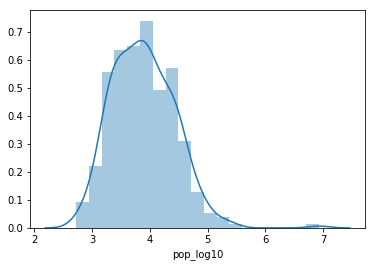

In [51]:
sns.distplot(df1['pop_log10']);

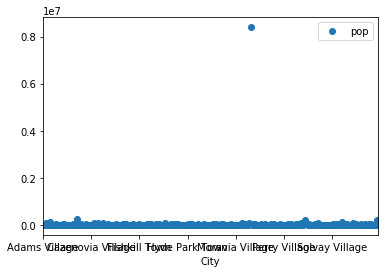

In [52]:
df1.plot(x='City', y='pop', style='o')

In [53]:
df1['pop_count'] = np.log10(df1['pop'] + 1)

In [54]:
df1.head()

,City,prop,pop,murd,rob,rob_cat,mur_cat,pop_2,pop_log10,pop_count
0,Adams Village,12,1861,0,0,0,0,3463321,3.269980,3.269980
1,Addison Town and Village,24,2577,0,0,0,0,6640929,3.411283,3.411283
2,Akron Village,16,2846,0,0,0,0,8099716,3.454387,3.454387
3,Albany,4090,97956,8,227,1,1,9595377936,4.991035,4.991035
4,Albion Village,223,6388,0,4,1,1,40806544,3.805433,3.805433


In [55]:
# Test to see if any NaN values
len(df1)- df1.count()

City         0
prop         0
pop          0
murd         0
rob          0
rob_cat      0
mur_cat      0
pop_2        0
pop_log10    0
pop_count    0
dtype: int64

In [56]:
# Propertycrime = α + Population + Population2 + Murder + Robbery
X = df1.loc[:,['pop','pop_2','mur_cat', 'rob_cat']].copy()
y = df1.loc[:,'prop'].copy() # Property Crime

In [57]:
# Split data into training and testing  
num_training = int(0.8 * len(X)) 
num_test = len(X) - num_training 

In [58]:
# Training data 
X_train, y_train = X[:num_training], y[:num_training] 
 
# Test data 
X_test, y_test = X[num_training:], y[num_training:] 

In [59]:
# Create the linear regressor model 
linear_regressor = linear_model.LinearRegression() 

# Train the model using the training sets 
linear_regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
# Predict the output 
y_test_pred = linear_regressor.predict(X_test) 

In [61]:
# Measure performance 
print("Linear Regressor performance:") 
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explained variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2)) 

Linear Regressor performance:
Mean absolute error = 303.7
Mean squared error = 464596.95
Median absolute error = 138.57
Explained variance score = 0.47
R2 score = 0.47


<h2> Rerun the regression using log10 transformation on population instead of population^2.
</h2>

In [62]:
# Propertycrime = α + Population + Population2 + Murder + Robbery
X = df1.loc[:,['pop','pop_log10','mur_cat', 'rob_cat']].copy()
y = df1.loc[:,'prop'].copy() # Property Crime

In [63]:
# Split data into training and testing  
num_training = int(0.8 * len(X)) 
num_test = len(X) - num_training 

In [64]:
# Training data 
X_train, y_train = X[:num_training], y[:num_training] 
 
# Test data 
X_test, y_test = X[num_training:], y[num_training:] 

In [65]:
# Create the linear regressor model 
linear_regressor = linear_model.LinearRegression() 

# Train the model using the training sets 
linear_regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
# Predict the output 
y_test_pred = linear_regressor.predict(X_test) 

In [67]:
# Measure performance 
print("Linear Regressor performance:") 
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explained variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2)) 

Linear Regressor performance:
Mean absolute error = 304.78
Mean squared error = 303409.44
Median absolute error = 201.0
Explained variance score = 0.65
R2 score = 0.65


<h2> R2 score imrpoves from 47% to 65% </h2>

<h2> Check for multivariate normality </h2>

In [68]:
print (type(X_test))
print (X_test.shape)
print (type(y_test_pred))
print (y_test_pred.shape)
print (type(y))
print (y.shape)

<class 'pandas.core.frame.DataFrame'>
(70, 4)
<class 'numpy.ndarray'>
(70,)
<class 'pandas.core.series.Series'>
(348,)


In [98]:
num2 = int((len(y_test_pred)/len(y))*len(y))
y_test1 = y[:num2] 
predicted = np.ravel(y_test_pred)

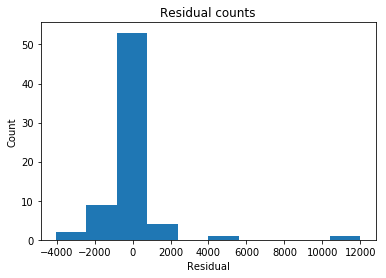

In [97]:
# Outliers or skewness in error 
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

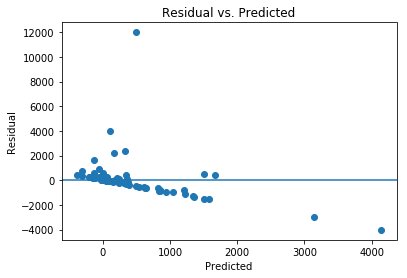

In [100]:
# The distribution of error terms (its "scedasticity"), should be consistent for all predicted values, or homoscedastic
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()
